In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
np.random.seed(5)
centers=[[1,1],[-1,-1],[1,-1]]
iris=datasets.load_iris()
iris_df=pd.DataFrame(data=iris['data'],columns=iris['feature_names'])

In [6]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Text(0.5, 1.0, 'Scree Plot')

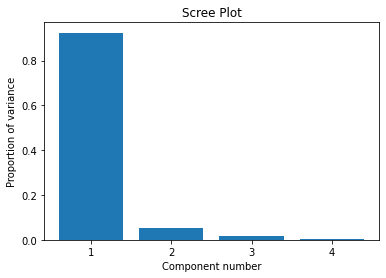

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca=pca.fit(iris_df)
plt.bar(np.arange(1,5),pca.explained_variance_ratio_)
plt.xticks(np.arange(1,5))
plt.xlabel('Component number')
plt.ylabel('Proportion of variance')
plt.title('Scree Plot')

As we can see, the first two components account for most of the variability in the data.Therefore  decided to keep only the first two components and discard the Rest. When having determined the number of components to keep, we can run a second PCA in which we reduce the number of features.

In [9]:
pca=PCA(n_components=2)
pca=pca.fit(iris_df)
iris_transformed=pca.transform(iris_df)

In [10]:
print(iris_transformed[:5])

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


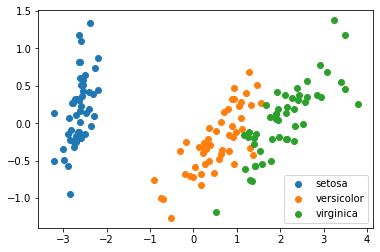

In [13]:
for i , species in enumerate(iris['target_names']):
  plt.scatter(iris_transformed[:,0][iris['target']==i],iris_transformed[:,1][iris['target']==i])
plt.legend(iris['target_names'])
plt.show()  

We can see, that much of the information in the data has been preserved and we could now train an ML model, that classifies the data points according to the three species